<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [69]:
# Check for GPU
!nvidia-smi

Sun Feb 18 23:56:35 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce 940MX         WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8             N/A /  200W |       0MiB /   2048MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [70]:
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.2.0+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Healthcare
2. Mobile Computing
3. Automotive Industry

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is an undesirabe behavoir of a machine learning model which gives accurate predictions on the training data but does relatively poor on new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Regularization: A technique to penalize the weights of the model and use that to reduce overfitting.
2. Get more data: Getting more data allows the model to learn better patterns.
3. Making the model less complex: In case of neural networks, this means that having small number of layers, or hidden units, or both.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

DONE!

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [71]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root="data/mnist/",
                            train=True,
                            download=True,
                            transform=ToTensor(),
                            target_transform=None)
test_data = datasets.MNIST(root="data/mnist/",
                           train=False,
                           download=True,
                           transform=ToTensor(),
                           target_transform=None)

classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [72]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data/mnist/
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data/mnist/
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [73]:
len(train_data), len(test_data)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [74]:
img, label = train_data[0]
img.shape

torch.Size([1, 28, 28])

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

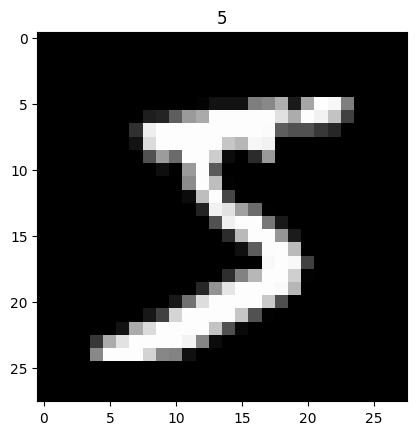

In [75]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray") # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label)

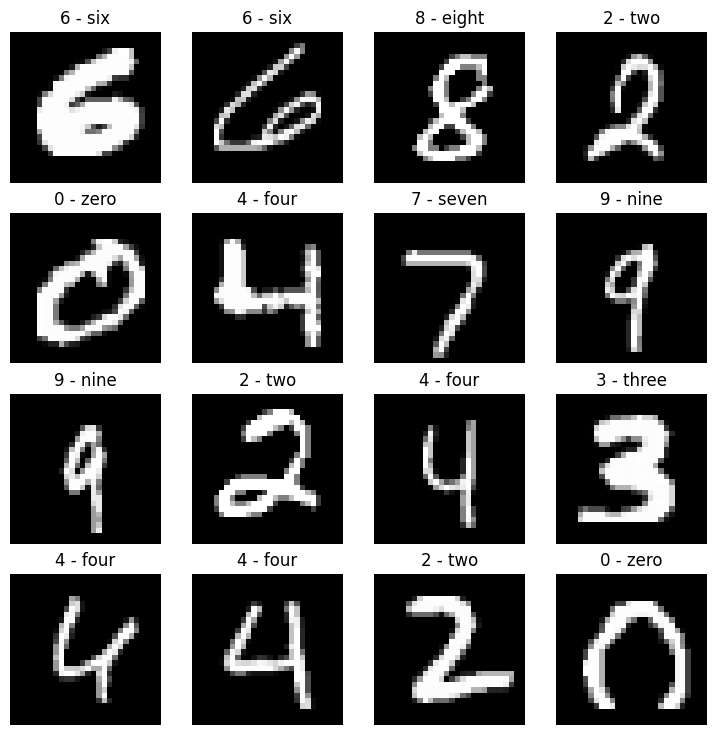

In [76]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(classes[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [77]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_data_loader = DataLoader(train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_data_loader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [78]:
for sample in next(iter(train_data_loader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [79]:
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(TinyVGG, self).__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_dim,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=10,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10 * 7 * 7,
                      out_features=out_dim)
        )

    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
            

In [80]:
torch.manual_seed(42)
model_0 = TinyVGG(1, 10).to(device)
model_0

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [81]:
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
acc_fn = Accuracy(task="multiclass", num_classes=len(classes)).to(device)
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [82]:
def train_step(model, data_loader, optimizer, loss_fn, acc_fn, device):

    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()

    for X, y in data_loader:

        X, y = X.to(device), y.to(device)

        # Get the raw outputs -> turn into probabilities -> get the class label
        # Can omit the 'turn into probabilites' and just do 'raw outputs -> get the class label'
        y_logits = model(X)
        y_preds = y_logits.softmax(dim=1).argmax(dim=1)

        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += acc_fn(y_preds, y)


        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model, data_loader, loss_fn, acc_fn, device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():

        for X, y in data_loader:

            X, y = X.to(device), y.to(device)

            test_logits = model(X)
            test_preds = test_logits.softmax(dim=1).argmax(dim=1)

            test_loss += loss_fn(test_logits, y)
            test_acc += acc_fn(test_preds, y)

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")


In [83]:
def fit(model, train_data, test_data, epochs, optimizer, loss_fn, acc_fn, device):

    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n---------")
        train_step(model, train_data, optimizer, loss_fn, acc_fn, device)
        test_step(model, test_data, loss_fn, acc_fn, device)


In [84]:
from timeit import default_timer as timer

In [122]:
start_time_train_cpu = timer()
fit(model_0, train_data_loader, test_data_loader, 5, loss_fn, acc_fn, "cpu")
end_time_train_cpu = timer()

end_time_train_cpu - start_time_train_cpu

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.19014 | Train accuracy: 0.94%


 20%|██        | 1/5 [01:06<04:24, 66.08s/it]

Test loss: 0.10370 | Test accuracy: 0.97%
Epoch: 1
---------
Train loss: 0.11418 | Train accuracy: 0.97%


 40%|████      | 2/5 [02:24<03:39, 73.33s/it]

Test loss: 0.09637 | Test accuracy: 0.97%
Epoch: 2
---------
Train loss: 0.10431 | Train accuracy: 0.97%


 60%|██████    | 3/5 [03:42<02:31, 75.65s/it]

Test loss: 0.09835 | Test accuracy: 0.97%
Epoch: 3
---------
Train loss: 0.10029 | Train accuracy: 0.97%


 80%|████████  | 4/5 [04:56<01:14, 74.74s/it]

Test loss: 0.08818 | Test accuracy: 0.97%
Epoch: 4
---------
Train loss: 0.09911 | Train accuracy: 0.97%


100%|██████████| 5/5 [06:04<00:00, 72.83s/it]

Test loss: 0.08937 | Test accuracy: 0.97%


364.16363280000223

In [35]:
model_gpu = TinyVGG(1, 10).to(device)
optimizer_gpu = torch.optim.Adam(params=model_gpu.parameters(), lr=0.01)

In [36]:
%%time

start_time_train_gpu = timer()
fit(model_gpu, train_data_loader, test_data_loader, 5, optimizer_gpu, loss_fn, acc_fn, "cuda")
end_time_train_gpu = timer()

end_time_train_gpu - start_time_train_gpu

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.18167 | Train accuracy: 0.94%
Test loss: 0.09023 | Test accuracy: 0.97%
Epoch: 1
---------
Train loss: 0.10566 | Train accuracy: 0.97%
Test loss: 0.08286 | Test accuracy: 0.97%
Epoch: 2
---------
Train loss: 0.09579 | Train accuracy: 0.97%
Test loss: 0.09889 | Test accuracy: 0.97%
Epoch: 3
---------
Train loss: 0.09274 | Train accuracy: 0.97%
Test loss: 0.07644 | Test accuracy: 0.97%
Epoch: 4
---------
Train loss: 0.09299 | Train accuracy: 0.97%
Test loss: 0.09906 | Test accuracy: 0.97%
CPU times: total: 3min 28s
Wall time: 3min 37s


217.7937632999965

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

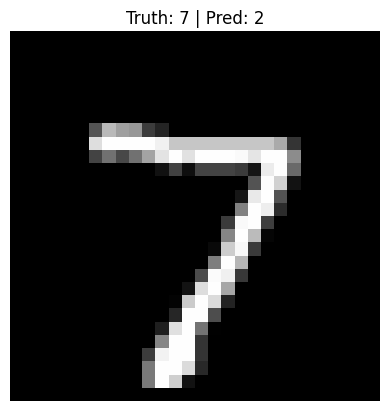

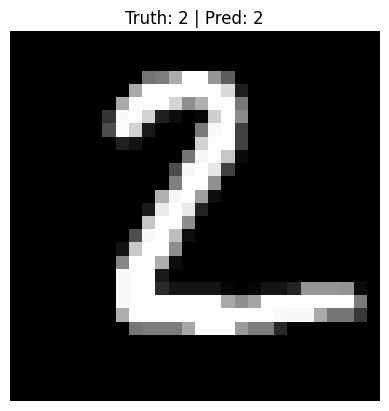

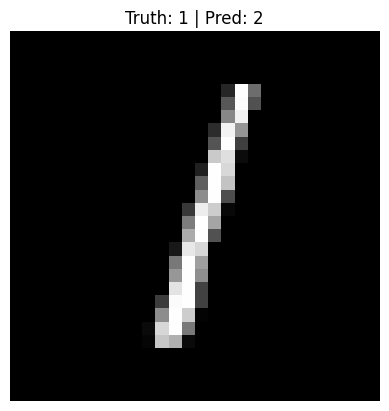

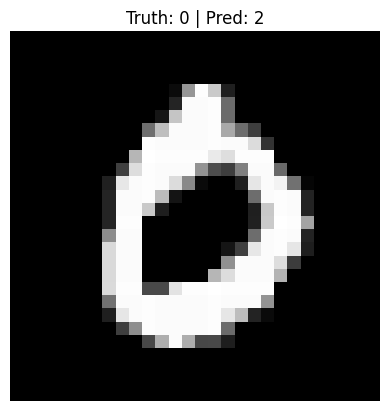

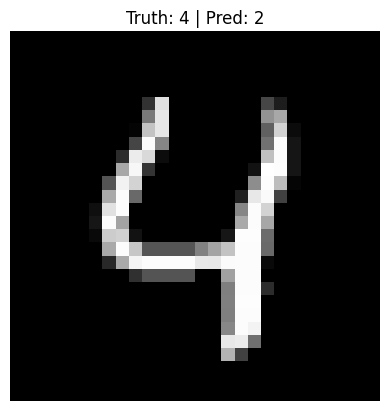

In [37]:
num_of_samples = 5

for i in range(num_of_samples):
    img, label = test_data[i]

    y_logits = model_0(img.unsqueeze(dim=0).to(device))
    y_pred = y_logits.softmax(dim=1).argmax(dim=1).cpu().item()

    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {y_pred}")
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [38]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


In [39]:
model_gpu.eval()
y_preds = []

with torch.inference_mode():
    for X, y in tqdm(test_data_loader):
        X, y = X.to(device), y.to(device)
        y_logits = model_gpu(X)
        y_labels = y_logits.softmax(dim=1).argmax(dim=1)
        y_preds.append(y_labels)
        
    y_preds = torch.cat(y_preds).cpu()    

  0%|          | 0/313 [00:00<?, ?it/s]

In [40]:
len(y_preds)

10000

In [41]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

cm = ConfusionMatrix(task="multiclass", num_classes=len(classes))
cm_tensor = cm(preds=y_preds, target=test_data.targets)
cm_tensor

tensor([[ 971,    0,    1,    0,    0,    0,    4,    1,    3,    0],
        [   0, 1132,    0,    1,    0,    0,    1,    1,    0,    0],
        [   8,   10,  994,    2,    6,    0,    0,    7,    4,    1],
        [   0,    0,    7,  984,    3,    6,    0,    8,    1,    1],
        [   0,    4,    1,    0,  961,    0,    3,    5,    2,    6],
        [   1,    1,    0,    5,    1,  868,   10,    2,    0,    4],
        [   4,    4,    1,    0,   10,    1,  932,    0,    6,    0],
        [   0,   10,    9,    1,    0,    0,    0, 1002,    2,    4],
        [  23,    0,   13,    3,    3,    4,    1,    4,  920,    3],
        [   5,    5,    0,    2,   21,    1,    0,   33,    4,  938]])

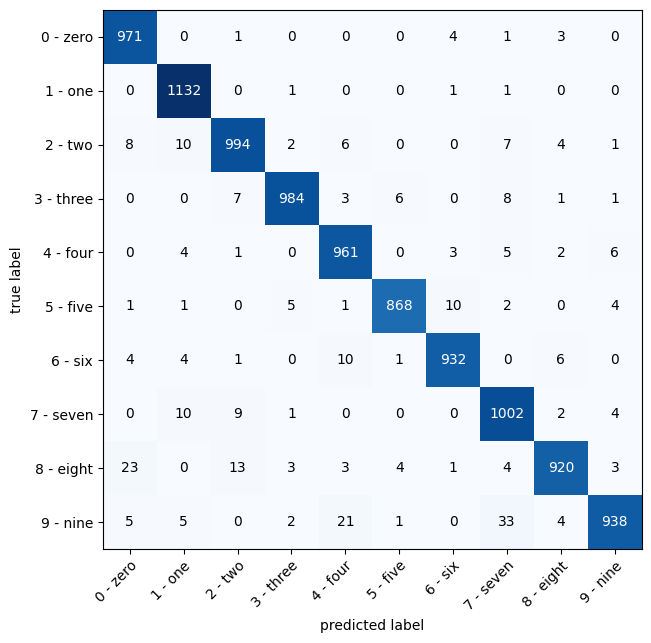

In [42]:
fig, ax = plot_confusion_matrix(
    conf_mat=cm_tensor.numpy(),
    class_names=classes,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [43]:
random_tensor = torch.randn(size=(1, 3, 64, 64))
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=16,
                       kernel_size=3,
                       stride=2,
                       padding="valid")
conv_layer(random_tensor).shape

torch.Size([1, 16, 31, 31])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [65]:
from torchvision.datasets import FashionMNIST

fashion_mnist_train_data = FashionMNIST(root="data/",
                                        download=True,
                                        train=True,
                                        transform=ToTensor(),
                                        target_transform=None)

fashion_mnist_test_data = FashionMNIST(root="data/",
                                       download=True,
                                       train=False,
                                       transform=ToTensor(),
                                       target_transform=None)

In [89]:
fashion_mnist_train_dataloader = DataLoader(
    fashion_mnist_train_data,
    batch_size=32,
    shuffle=True
)

fashion_mnist_test_dataloader = DataLoader(
    fashion_mnist_test_data,
    batch_size=32,
    shuffle=False
)

In [110]:
class_names = fashion_mnist_train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [90]:
fashion_model_gpu = TinyVGG(1, 10).to(device)
optimizer_gpu = torch.optim.Adam(params=fashion_model_gpu.parameters(), lr=0.01)

In [91]:
%%time

start_time_train_gpu = timer()
fit(fashion_model_gpu, fashion_mnist_train_dataloader, fashion_mnist_test_dataloader, 5, optimizer_gpu, loss_fn, acc_fn, "cuda")
end_time_train_gpu = timer()

end_time_train_gpu - start_time_train_gpu

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.44272 | Train accuracy: 0.84%
Test loss: 0.38305 | Test accuracy: 0.86%
Epoch: 1
---------
Train loss: 0.35899 | Train accuracy: 0.87%
Test loss: 0.35804 | Test accuracy: 0.88%
Epoch: 2
---------
Train loss: 0.34746 | Train accuracy: 0.87%
Test loss: 0.37956 | Test accuracy: 0.86%
Epoch: 3
---------
Train loss: 0.34008 | Train accuracy: 0.87%
Test loss: 0.36495 | Test accuracy: 0.88%
Epoch: 4
---------
Train loss: 0.33759 | Train accuracy: 0.88%
Test loss: 0.36766 | Test accuracy: 0.87%
CPU times: total: 3min 25s
Wall time: 3min 33s


213.24101320000773

In [97]:
for batch, (X, y) in enumerate(fashion_mnist_test_dataloader):
    X, y = X.to(device), y.to(device)
    y_logits = fashion_model_gpu(X)
    y_preds = y_logits.argmax(dim=1)
    # misclassified_preds = torch.ne(y_preds, y)
    break

In [103]:
misclassified_samples_indices = misclassified_preds.nonzero().squeeze()
misclassified_samples_indices

tensor([12, 21, 23, 25], device='cuda:0')

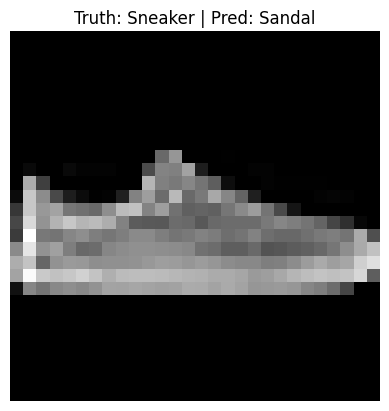

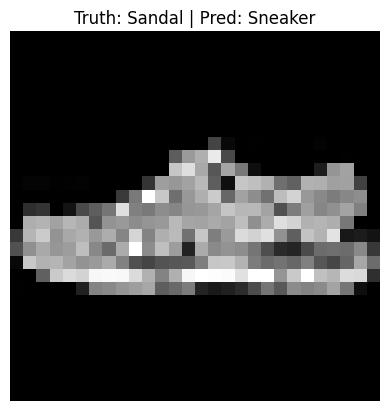

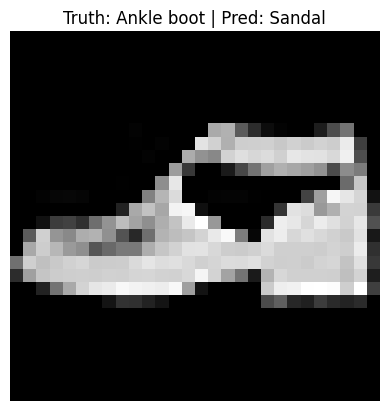

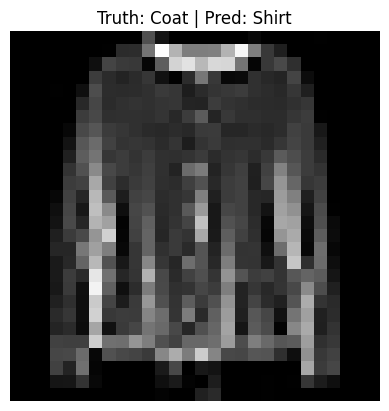

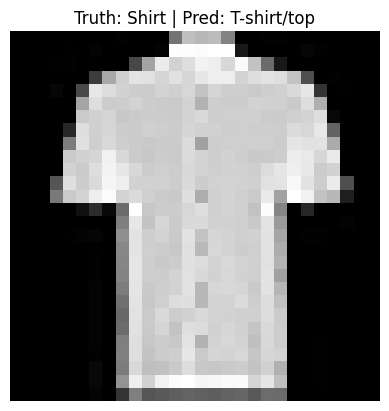

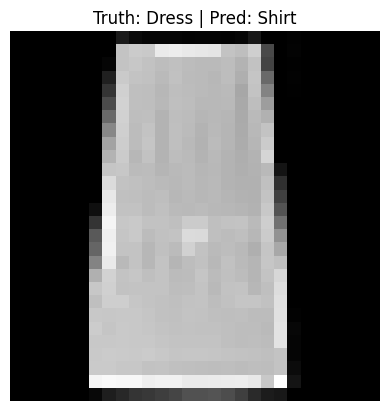

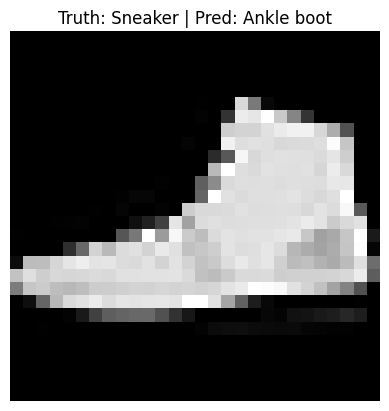

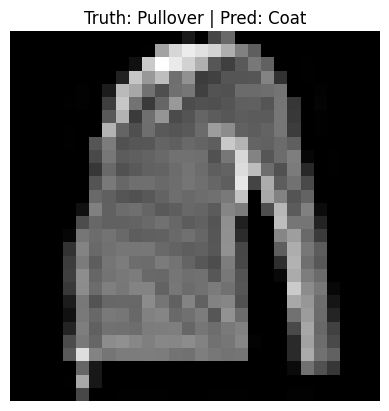

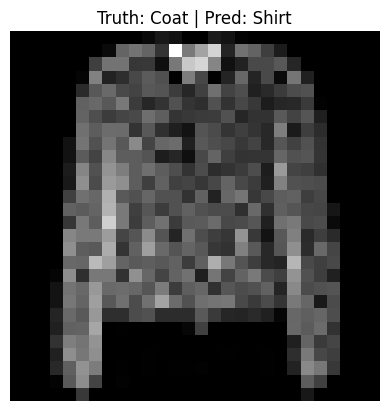

In [112]:
num_of_samples = 64

for i in range(num_of_samples):
    img, label = fashion_mnist_test_data[i]

    y_logits = fashion_model_gpu(img.unsqueeze(dim=0).to(device))
    y_pred = y_logits.argmax(dim=1).cpu().item()
    y_pred_class = class_names[y_pred]
    label = class_names[label]

    if y_pred_class != label:
        plt.figure()
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"Truth: {label} | Pred: {y_pred_class}")
        plt.axis(False)